#### IMPORTING THE NECESSARY LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.graph_objects as gp

#### READING THE CENSUS CSV FILE


In [4]:
census_df = pd.read_csv('census17.csv')

### DATA FRAME CLEANING

#### Inspecting the first 5 rows in the Dataframe

In [5]:
census_df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Bulldog Crescent,Harry,Baldwin,36.0,Head,Married,Male,Education administrator,None,None
1,1,Bulldog Crescent,Heather,Baldwin,30.0,Wife,Married,Female,Purchasing manager,None,None
2,1,Bulldog Crescent,Katy,Baldwin,0.0,Daughter,NaN,Female,Child,None,NaN
3,1,Bulldog Crescent,Philip,Giles,40.0,Lodger,Divorced,Male,Manufacturing engineer,None,None
4,1,Bulldog Crescent,Shannon,Allen,31.0,Lodger,Single,Female,Restaurant manager,None,Catholic


##### Getting more information about the Dataframe

In [6]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   House Number                   9426 non-null   int64  
 1   Street                         9426 non-null   object 
 2   First Name                     9426 non-null   object 
 3   Surname                        9426 non-null   object 
 4   Age                            9426 non-null   float64
 5   Relationship to Head of House  9426 non-null   object 
 6   Marital Status                 6996 non-null   object 
 7   Gender                         9426 non-null   object 
 8   Occupation                     9426 non-null   object 
 9   Infirmity                      9426 non-null   object 
 10  Religion                       6937 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 810.2+ KB


#### Changing the Age to int data type 

In [7]:
census_df['Age'] = census_df['Age'].astype('int64')

# print the data frame 
census_df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Bulldog Crescent,Harry,Baldwin,36,Head,Married,Male,Education administrator,None,None
1,1,Bulldog Crescent,Heather,Baldwin,30,Wife,Married,Female,Purchasing manager,None,None
2,1,Bulldog Crescent,Katy,Baldwin,0,Daughter,NaN,Female,Child,None,NaN
3,1,Bulldog Crescent,Philip,Giles,40,Lodger,Divorced,Male,Manufacturing engineer,None,None
4,1,Bulldog Crescent,Shannon,Allen,31,Lodger,Single,Female,Restaurant manager,None,Catholic
...,...,...,...,...,...,...,...,...,...,...,...
9421,1,Duchess Longhouse,Iain,Gardner,29,Son,Single,Male,"Designer, fashion/clothing",None,None
9422,1,Duchess Longhouse,Ashleigh,Gardner,29,Daughter,Single,Female,Farm manager,None,None
9423,1,Stephenson Barn,Anna,Reed,53,Head,Married,Female,Financial planner,None,Christian
9424,1,Stephenson Barn,Gregory,Reed,54,Husband,Married,Male,Naval architect,None,None


### Checking for empty entries in the data frame

In [8]:
empty_entries = census_df == ' '
empty_entries.sum()

House Number                     0
Street                           0
First Name                       1
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   1
Gender                           0
Occupation                       1
Infirmity                        7
Religion                         1
dtype: int64

#### Conclusion: Columns with empty entries are 
1. First name
2. Occupation
3. Marital Status
4. Infirmity
5. Religion

#### 1. Empty entries in the First Name column

In [9]:
census_df.loc[census_df['First Name'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6815,14,Kelly Street,,Stephens,51,Wife,Married,Female,"Engineer, manufacturing systems",None,Catholic


#### Replacing the empty entry with 'Unknown'

In [10]:
census_df['First Name'] = census_df['First Name'].replace([' '], 'Unknown')

# confirming the change
census_df.loc[census_df['First Name'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


#### 2. Empty entry in the Occupation Column

In [11]:
census_df.loc[census_df['Occupation'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8078,7,Green Glens,Jill,Stevens,9,Daughter,NaN,Female,,None,NaN


In [12]:
# uniques entries in the occupation for age 9
census_df.loc[(census_df['Age'] == 9)]['Occupation'].unique()

array(['Student', ' '], dtype=object)

#### Replace the empty entry in the Occupation column to 'Student'

In [13]:
census_df['Occupation'] = census_df['Occupation'].replace(' ', 'Student')

# confirming the change
census_df.loc[census_df['Occupation'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


#### 3. Empty entry in the marital Status column

In [14]:
census_df.loc[census_df['Marital Status'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8941,4,Parsons Inlet,Jason,Davies,56,Husband,,Male,Geochemist,None,Catholic


In [15]:
census_df.loc[(census_df['Street'] == 'Parsons Inlet') & 
             (census_df['Surname'] == 'Davies') &
              (census_df['House Number'] == 4)
             ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8940,4,Parsons Inlet,Heather,Davies,51,Head,Married,Female,Equality and diversity officer,None,Catholic
8941,4,Parsons Inlet,Jason,Davies,56,Husband,,Male,Geochemist,None,Catholic
8942,4,Parsons Inlet,Jacqueline,Davies,12,Daughter,NaN,Female,Student,None,NaN
8943,4,Parsons Inlet,Gavin,Davies,11,Son,NaN,Male,Student,None,NaN


#### Replacing the empty entry in the Marital Status with 'Married'

In [16]:
census_df['Marital Status'] = census_df['Marital Status'].replace(' ', 'Married')
census_df.loc[census_df['Marital Status'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


#### 4. Empty entries in the Infirmity column

In [17]:
census_df.loc[census_df['Infirmity'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1048,126,Love Avenue,Jake,Hughes,56,Lodger,Single,Male,Unemployed,,Christian
1061,128,Love Avenue,Melanie,Poole,32,Lodger,Single,Female,Horticultural therapist,,Methodist
1537,199,Love Avenue,Toby,John,24,Son,Single,Male,"Administrator, arts",,None
2395,7,Merlin Extension,Cheryl,Smith,40,Head,Divorced,Female,Industrial/product designer,,None
3683,22,Morar Lane,Gail,Long,30,Head,Single,Female,Armed forces training and education officer,,Muslim
4954,134,Virgofix Crescent,Derek,Poole,0,Son,NaN,Male,Child,,NaN
8220,29,Green Glens,Jeremy,Green-Morgan,20,Son,Single,Male,University Student,,Christian


In [18]:
census_df['Infirmity'].mode()

0    None
Name: Infirmity, dtype: object

#### Replacing the empty entries in the Infirmity column to 'None'

In [19]:
census_df['Infirmity'] = census_df['Infirmity'].replace(' ', 'None')
census_df.loc[census_df['Infirmity'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


#### 5. Empty entries in the Religion column

In [20]:
census_df.loc[census_df['Religion'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8840,4,ExcaliburBells Street,Jean,O'Brien,43,Wife,Married,Female,Ecologist,None,


In [21]:
census_df.loc[(census_df['Street'] == 'ExcaliburBells Street') & 
             (census_df['Surname'] == "O'Brien") &
              (census_df['House Number'] == 4)
             ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8839,4,ExcaliburBells Street,Clifford,O'Brien,46,Head,Married,Male,Child psychotherapist,None,Christian
8840,4,ExcaliburBells Street,Jean,O'Brien,43,Wife,Married,Female,Ecologist,None,
8841,4,ExcaliburBells Street,Tracy,O'Brien,15,Daughter,NaN,Female,Student,None,NaN


#### Replacing the empty entry in the Religion to 'Unknown'

In [22]:
census_df['Religion'] = census_df['Religion'].replace(' ', 'Unknown')

census_df.loc[census_df['Religion'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


### Checking for NaN entries 

In [23]:
census_df.isna().any()

House Number                     False
Street                           False
First Name                       False
Surname                          False
Age                              False
Relationship to Head of House    False
Marital Status                    True
Gender                           False
Occupation                       False
Infirmity                        False
Religion                          True
dtype: bool

In [24]:
census_df.isna().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   2430
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2489
dtype: int64

#### Observation for NaN entries in the dataframe: 
The columns containing nan entries are:
1. Marital Status.
2. Religion.

#### 1. Inspecting the nan entries in the Marital Status

In [25]:
# Filtering out the NaN entries of the marital status column for futher analysis
marital_nan = census_df[census_df['Marital Status'].isna()]

# printing the filtered NaN entries 
marital_nan


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2,1,Bulldog Crescent,Katy,Baldwin,0,Daughter,NaN,Female,Child,None,NaN
9,3,Bulldog Crescent,Pauline,Roberts,11,Daughter,NaN,Female,Student,None,NaN
12,4,Bulldog Crescent,Maureen,Yates,13,Daughter,NaN,Female,Student,None,NaN
15,5,Bulldog Crescent,Cheryl,Smith,16,Daughter,NaN,Female,Student,None,NaN
25,10,Bulldog Crescent,Denis,Khan,10,Son,NaN,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9400,1,Stevens Lodge,Hollie,Tucker,9,Granddaughter,NaN,Female,Student,None,NaN
9401,1,Stevens Lodge,Norman,Spencer,6,Grandson,NaN,Male,Student,None,NaN
9406,1,Dolphin Lodge,Pamela,Griffiths,15,Daughter,NaN,Female,Student,None,NaN
9407,1,Dolphin Lodge,Clifford,Griffiths,15,Adopted Son,NaN,Male,Student,None,NaN


In [26]:
# getting the description of the nan entries in the Marital Status
marital_nan.describe()

,House Number,Age
count,2430.000000,2430.000000
mean,52.688477,9.045679
std,55.148675,5.091017
min,1.000000,0.000000
25%,11.000000,5.000000
50%,31.000000,9.000000
75%,78.000000,14.000000
max,230.000000,17.000000


In [27]:
# getting the unique values of the nan entries in the Marital Status
marital_nan['Occupation'].unique()

array(['Child', 'Student'], dtype=object)

#### Observation on the nan entries of the Marital Status Column
1. The minimum and Maximum age of entries containing nan values are 0 and 17.

2. The occupation of the entries containing nan values are 'Child', 'Student'.

#### Conclusion: Replacing the martial status nan entries to 'Single Child' and 'Single Student' 

In [28]:
# Replacing the Child nan marital status entries to Single Child
census_df['Marital Status'] = np.where((census_df['Occupation'] == 'Child') &
                                       (census_df['Marital Status'].isna()), 
                                       'Single Child', census_df['Marital Status'])

# Replacing the Student nan marital status entries to Single Student
census_df['Marital Status'] = np.where((census_df['Occupation'] == 'Student') &
                                       (census_df['Marital Status'].isna()), 
                                       'Single Student', census_df['Marital Status'])

# confirming the change 
census_df['Marital Status'].unique()

array(['Married', 'Single Child', 'Divorced', 'Single', 'Single Student',
       'Widowed'], dtype=object)

#### 2. Inspecting the nan entries in the Religion column

In [29]:
# Filtering out the NaN entries of the religion column for futher analysis
religion_nan = census_df[census_df['Religion'].isna()]

# printing the dataframe
religion_nan

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2,1,Bulldog Crescent,Katy,Baldwin,0,Daughter,Single Child,Female,Child,None,NaN
9,3,Bulldog Crescent,Pauline,Roberts,11,Daughter,Single Student,Female,Student,None,NaN
12,4,Bulldog Crescent,Maureen,Yates,13,Daughter,Single Student,Female,Student,None,NaN
15,5,Bulldog Crescent,Cheryl,Smith,16,Daughter,Single Student,Female,Student,None,NaN
25,10,Bulldog Crescent,Denis,Khan,10,Son,Single Student,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9400,1,Stevens Lodge,Hollie,Tucker,9,Granddaughter,Single Student,Female,Student,None,NaN
9401,1,Stevens Lodge,Norman,Spencer,6,Grandson,Single Student,Male,Student,None,NaN
9406,1,Dolphin Lodge,Pamela,Griffiths,15,Daughter,Single Student,Female,Student,None,NaN
9407,1,Dolphin Lodge,Clifford,Griffiths,15,Adopted Son,Single Student,Male,Student,None,NaN


In [30]:
# Getting the unique values in the religion column
census_df['Religion'].unique()

array(['None', nan, 'Catholic', 'Methodist', 'Christian', 'Muslim',
       'Private', 'Jewish', 'Sikh', 'Nope', 'Buddist', 'Baptist', 'Sith',
       'Bahai', 'Agnostic', 'Orthodoxy', 'Unknown'], dtype=object)

In [31]:
# Getting the series description
census_df['Religion'].describe()

count     6937
unique      16
top       None
freq      3114
Name: Religion, dtype: object

#### replacing the Religion nan entries with None 

In [32]:
census_df['Religion']= census_df['Religion'].fillna('None')

#### Confirming Data Cleaning

In [33]:
census_df.isna().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64

In [34]:
empty_entries = census_df == ' '
empty_entries.sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64

### DATA ANALYSIS

#### 1. Age distribution pyramid of the data frame

In [35]:
# Creating a function that return the count of entries of a specified gender within a specified age range.
def get_age_range(df, gender, start_age, end_age):
    return df[(df['Gender']==gender) 
              &(df["Age"] >= start_age) 
              &(df['Age'] <= end_age)].count()['Gender'] 

In [36]:
# creating the age range
age_range = ['0-4','5-9','10-14','15-19','20-24','25-29', '30-34','35-39',
             '40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79',
             '80-84','85-89','90-94','95-99','100+']

# Create empty list for male(m), and female(f)
m=[]
f=[]

# looping through the age-range
for i in age_range:
    start=0
    end=0
    
    # spliting the age_range into start and end  
    if '-' in i:
        age = i.split('-')
        start = int(age[0])
        end = int(age[1])
    else:
        # element in index not a range, manual specify the start and end range 
        start = 100
        end = 200
        
    # append
    m.append(get_age_range(census_df, 'Male', start, end))
    f.append(get_age_range(census_df, 'Female', start, end))

print('Male:' , m)
print('Female:', f)



Male: [297, 333, 368, 369, 373, 284, 301, 353, 332, 309, 291, 262, 207, 136, 107, 72, 66, 37, 9, 4, 5]
Female: [268, 354, 347, 397, 370, 345, 342, 423, 413, 373, 321, 260, 217, 159, 121, 87, 69, 29, 9, 3, 4]


In [37]:
# Creating a new data frame
age_df = pd.DataFrame({'Age':age_range,
                      'Male': m,
                      'Female': f})

# printing the new dataframe
age_df

,Age,Male,Female
0,0-4,297,268
1,5-9,333,354
2,10-14,368,347
3,15-19,369,397
4,20-24,373,370
5,25-29,284,345
6,30-34,301,342
7,35-39,353,423
8,40-44,332,413
9,45-49,309,373


In [1]:
# Extracting the data from the new dataframe
y_age = age_df['Age']
x_M = age_df['Male']
x_F = age_df['Female'] * -1

# creating an instance of the figure
fig = gp.Figure()

# Adding the Male data to the figure
fig.add_trace(gp.Bar(y= y_age, x = x_M,
                    name = 'Male',
                    orientation='h'))

# Adding the Female data to the figure
fig.add_trace(gp.Bar(y= y_age, x = x_F,
                    name = 'Female',
                    orientation='h'))

# updating the layout for the graph
fig.update_layout(title ='The Age Pyramid of the Census Dataframe',
                 title_font_size = 22,
                 barmode = 'relative',
                 bargap = 0.0,
                 bargroupgap = 0,
                 xaxis = dict(title_font_size =14,
                              title = 'Population Count',
                             tickvals =[-400, -300, -200, -100,
                                       0,
                                       100, 200, 300, 400],
                             ticktext = ['400', '300','200', '100','0',
                                        '100','200','300','400']
                             ))
fig.show()

NameError: name 'age_df' is not defined

In [41]:
# Filtering age 0 -14 Pre-reproductive age
pre_repro_df =census_df.loc[(census_df['Age'] >=0) 
                   & (census_df['Age'] <= 14)] 

# describing the pre-reproductive age
pre_repro_df.describe()

,House Number,Age
count,1967.000000,1967.000000
mean,52.045247,7.424504
std,54.771202,4.249621
min,1.000000,0.000000
25%,11.000000,4.000000
50%,31.000000,7.000000
75%,77.000000,11.000000
max,230.000000,14.000000


In [42]:
# Filtering age 15-44 Reproductive age
repro_df =census_df.loc[(census_df['Age'] >= 15) 
                   & (census_df['Age'] <= 44)] 

# describing the reproductive age
repro_df.describe()

,House Number,Age
count,4302.000000,4302.000000
mean,49.389586,29.500697
std,54.343040,8.899520
min,1.000000,15.000000
25%,10.000000,21.000000
50%,27.000000,30.000000
75%,69.000000,37.000000
max,230.000000,44.000000


In [49]:
# checking the marital staus of the reproductive age (15-44)
repro_df['Marital Status'].describe()

count       4302
unique         5
top       Single
freq        2309
Name: Marital Status, dtype: object

In [121]:
# occupation description in the reproductive age population dataframe
repro_df['Occupation'].describe()

count                   4302
unique                   632
top       University Student
freq                     608
Name: Occupation, dtype: object

In [61]:
#repro_df['Occupation'].unique()
repro_df.loc[repro_df['Occupation'] == 'Unemployed'].describe()

,House Number,Age
count,330.000000,330.000000
mean,49.154545,34.209091
std,54.601711,6.648028
min,1.000000,19.000000
25%,10.000000,29.000000
50%,28.500000,35.000000
75%,72.500000,40.000000
max,227.000000,44.000000


In [58]:
# most occured Age in the reproductive age population data frame
repro_df['Age'].mode()

0    15
Name: Age, dtype: int64

In [48]:
# most occured Relationship to Head of House in the reproductive age population
repro_df['Relationship to Head of House'].mode()

0    Head
Name: Relationship to Head of House, dtype: object

In [152]:
# Filtering age 45 upwards, Post Reproductive age
post_repro_df =census_df.loc[(census_df['Age'] >= 45) ] 

# describing the reproductive age
post_repro_df.describe()

,House Number,Age
count,3157.00000,3157.000000
mean,46.49414,59.588217
std,52.46467,11.476552
min,1.00000,45.000000
25%,10.00000,50.000000
50%,24.00000,57.000000
75%,60.00000,66.000000
max,229.00000,105.000000


In [153]:
post_repro_df['Occupation'].describe()

count           3157
unique          1051
top       Unemployed
freq             248
Name: Occupation, dtype: object

In [98]:
post_repro_unemployed = post_repro_df.loc[post_repro_df['Occupation'] == 'Unemployed']

post_repro_unemployed

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
14,5,Bulldog Crescent,Christopher,Smith,52,Husband,Married,Male,Unemployed,None,None
37,14,Bulldog Crescent,Carly,Clarke,49,Head,Married,Female,Unemployed,None,Methodist
85,3,Guardian Port,Elizabeth,Elliott,63,Head,Single,Female,Unemployed,None,None
91,5,Guardian Port,Abigail,Bryan,51,Head,Single,Female,Unemployed,None,None
125,5,Merlin Road,Pauline,O'Brien,51,Wife,Married,Female,Unemployed,None,Christian
...,...,...,...,...,...,...,...,...,...,...,...
9275,7,Open Inlet,Christopher,Blackburn,48,Head,Divorced,Male,Unemployed,None,Catholic
9296,1,Hughes Lane,Emily,Finch,48,Head,Single,Female,Unemployed,None,None
9340,17,Hughes Lane,Jasmine,Smith,72,Head,Widowed,Female,Unemployed,None,None
9343,18,Hughes Lane,Caroline,Adams,70,Head,Divorced,Female,Unemployed,None,Methodist


In [97]:
post_repro_unemployed.describe()

,House Number,Age
count,248.000000,248.000000
mean,46.709677,56.258065
std,52.848768,9.151333
min,1.000000,45.000000
25%,10.000000,48.000000
50%,26.000000,55.000000
75%,59.250000,63.000000
max,219.000000,83.000000


In [106]:
post_repro_unemployed['Age'].mode()

0    46
Name: Age, dtype: int64

In [107]:
post_repro_unemployed['Gender'].describe()

count        248
unique         2
top       Female
freq         166
Name: Gender, dtype: object

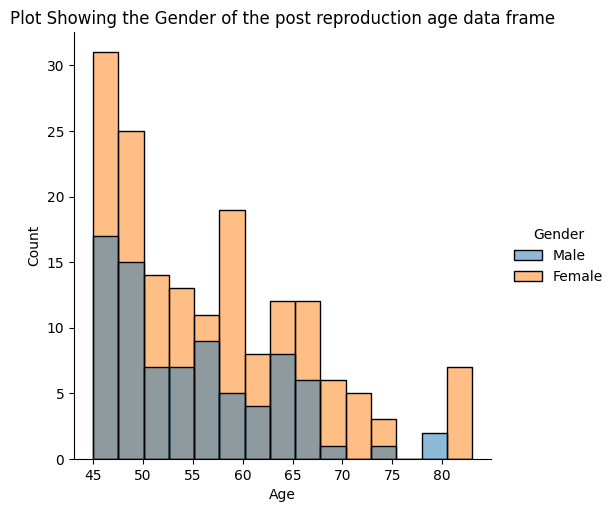

In [162]:
post_repro_plot = sns.displot(post_repro_unemployed, 
            x = post_repro_unemployed['Age'], 
            bins = 15,
            hue = post_repro_unemployed['Gender'])

# set title
post_repro_plot.set(title = "Plot Showing the Gender of the post reproduction age data frame")

In [159]:
post_repro_plot.savefig('post_reproduction_plot.png')

In [125]:
census_df.loc[census_df['Occupation'] == 'Unemployed'].describe()

,House Number,Age
count,578.000000,578.000000
mean,48.105536,43.669550
std,53.823941,13.429441
min,1.000000,19.000000
25%,10.000000,34.000000
50%,27.500000,42.000000
75%,68.000000,52.000000
max,227.000000,83.000000


In [155]:
census_df[census_df['Occupation'].str.contains("Retired")]

count                                   716
unique                                  435
top       Retired Building control surveyor
freq                                      5
Name: Occupation, dtype: object